<a href="https://colab.research.google.com/github/muskanlalit18/Security-Application-using-Image-Classification/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 Building the CNN

# Importing Keras packages and libraries

In [0]:
%tensorflow_version 1.14
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense





`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.



#Initializing the CNN


In [0]:

classifier = Sequential()



#Step 1 - Convolution


In [0]:

classifier.add(Convolution2D(filters = 32, kernel_size = (3, 3), input_shape = (128, 128, 3), activation = 'relu'))





#Step 2 - Pooling

In [0]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

#Adding multiple convolution layers

In [0]:

classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [0]:

classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


# Step 3 - Flattening

In [0]:

classifier.add(Flatten())


# Step 4 - Full connection

In [0]:

classifier.add(Dense(activation = 'relu', units = 128))
classifier.add(Dense(activation = 'sigmoid', units = 1))

# Compiling the CNN

In [0]:
from keras.optimizers import SGD
opt = SGD(lr=1e-6)
classifier.compile(loss = "binary_crossentropy", optimizer = opt, metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])


ERROR! Session/line number was not unique in database. History logging moved to new session 63

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Part 2 Fitting the CNN to the images

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# unzipping a file uploaded on the drive

In [0]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '17SzuqDzvm9Uqx4GPqwSI0Yt8NebueeEy'})
download.GetContentFile('dataset.tar')

In [0]:
from google.colab import files

In [0]:
!unzip dataset.tar


Streaming output truncated to the last 5000 lines.
  inflating: dataset/training_set/babies/images233.jpg  
  inflating: dataset/training_set/babies/images234 (2).jpg  
  inflating: dataset/training_set/babies/images234 (3).jpg  
  inflating: dataset/training_set/babies/images234 (4).jpg  
  inflating: dataset/training_set/babies/images234 (5).jpg  
  inflating: dataset/training_set/babies/images234 (6).jpg  
  inflating: dataset/training_set/babies/images234 (7).jpg  
  inflating: dataset/training_set/babies/images234.jpg  
  inflating: dataset/training_set/babies/images235 (2).jpg  
  inflating: dataset/training_set/babies/images235 (3).jpg  
  inflating: dataset/training_set/babies/images235 (4).jpg  
  inflating: dataset/training_set/babies/images235 (5).jpg  
  inflating: dataset/training_set/babies/images235 (6).jpg  
  inflating: dataset/training_set/babies/images235 (7).jpg  
  inflating: dataset/training_set/babies/images235.jpg  
  inflating: dataset/training_set/babies/image

# obtaining the dataset

In [0]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
                                                 'dataset/training_set',
                                                  target_size=(128, 128),
                                                  batch_size=64,
                                                  class_mode='binary',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory(
                                            'dataset/test_set',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='binary',
                                            shuffle=True)



Found 6169 images belonging to 2 classes.
Found 1531 images belonging to 2 classes.


# Fitting the model

In [0]:
history = classifier.fit_generator(
                         training_set,
                         samples_per_epoch = 6169,
                         epochs = 100,
                         validation_data = test_set,
                         validation_steps = 1531)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=100, validation_data=<keras_pre..., validation_steps=1531, steps_per_epoch=96)`
  


Epoch 1/100
 4/96 [>.............................] - ETA: 3:15 - loss: 0.3585 - acc: 0.8398

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


41/96 [===========>..................] - ETA: 1:30 - loss: 0.3517 - acc: 0.8498

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


95/96 [============================>.] - ETA: 1s - loss: 0.3286 - acc: 0.8636

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


96/96 [==============================] - 1515s 16s/step - loss: 0.3275 - acc: 0.8644 - val_loss: 0.6564 - val_acc: 0.7557
Epoch 2/100
96/96 [==============================] - 1510s 16s/step - loss: 0.3040 - acc: 0.8741 - val_loss: 0.2833 - val_acc: 0.8916
Epoch 3/100
96/96 [==============================] - 1510s 16s/step - loss: 0.2912 - acc: 0.8827 - val_loss: 0.2533 - val_acc: 0.9033
Epoch 4/100
96/96 [==============================] - 1512s 16s/step - loss: 0.2753 - acc: 0.8928 - val_loss: 0.2688 - val_acc: 0.9022
Epoch 5/100
96/96 [==============================] - 1507s 16s/step - loss: 0.2627 - acc: 0.8968 - val_loss: 0.2725 - val_acc: 0.8908
Epoch 6/100
96/96 [==============================] - 1515s 16s/step - loss: 0.2541 - acc: 0.8983 - val_loss: 0.3596 - val_acc: 0.8623
Epoch 7/100
96/96 [==============================] - 1507s 16s/step - loss: 0.2330 - acc: 0.9088 - val_loss: 0.3070 - val_acc: 0.8819
Epoch 8/100
96/96 [==============================] - 1512s 16s/step - loss

# Plotting the results


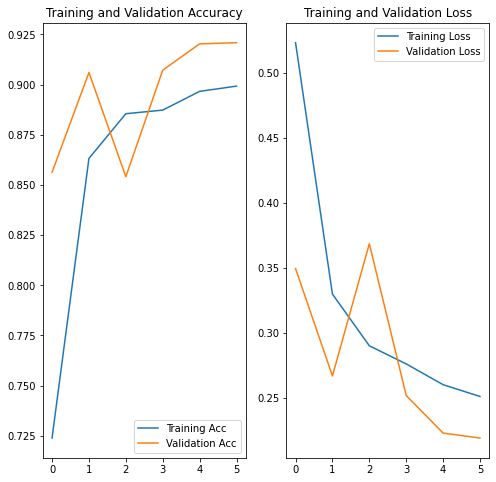

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(6)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Acc')
plt.plot(epochs_range, val_acc, label='Validation Acc')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
classifier.summary()

#  Displaying images


In [0]:
sample_training_images, _ = next(train_datagen)

In [0]:

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
  plotImages(sample_training_images[:5])

# Evaluating

In [0]:
loss, acc = classifier.evaluate(test_set,  verbose = 0)
print(acc * 100)
print(loss)

# Testing a new image


In [0]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/drive/My Drive/dataset/dataset/pets_2.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0]>0.5:
  prediction = 'pets'
else:
  prediction = 'babies'
print(result)
print(prediction)


In [0]:
import numpy as np
from keras.preprocessing import image
import cv2  


test_image = image.load_img('/content/drive/My Drive/dataset/dataset/pets_2.jpg', target_size = (256,256))
test_image = np.array(test_image).reshape( -1, 256,256, 1)
prediction = classifier.predict({'input': test_image })
print(prediction)